In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/Life Expectancy Data.csv')

In [3]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
data.shape

(2938, 22)

In [6]:
missingData = data.apply(lambda x: 2938-x.count(), axis = 0)

In [7]:
missingData

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
data[data['Adult Mortality'].isna() != False]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [9]:
data[data[' BMI '].isna() != False]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0


In [10]:
missingPop = data[data['Population'].isna() != False]

In [11]:
len(missingPop["Country"].unique())

49

In [12]:
missingPop["Country"].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Brunei Darussalam',
       "Côte d'Ivoire", 'Congo', 'Cook Islands', 'Cuba', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominica', 'Egypt', 'Eritrea',
       'Gambia', 'Grenada', 'Iran (Islamic Republic of)', 'Kuwait',
       'Kyrgyzstan', "Lao People's Democratic Republic", 'Libya',
       'Marshall Islands', 'Micronesia (Federated States of)', 'Monaco',
       'Nauru', 'New Zealand', 'Niue', 'Oman', 'Qatar',
       'Republic of Korea', 'Republic of Moldova',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia',
       'Singapore', 'Slovakia', 'Somalia',
       'The former Yugoslav republic of Macedonia',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of Am

In [13]:
data[data["Country"] == "United Arab Emirates"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2746,United Arab Emirates,2015,Developing,77.1,75.0,1,NaN,0.000000,99.0,347,...,99.0,NaN,99.0,0.1,3911.74689,NaN,5.3,5.1,0.836,13.3
2747,United Arab Emirates,2014,Developing,76.9,77.0,1,1.91,3862.682710,99.0,344,...,99.0,3.64,99.0,0.1,44449.74350,NaN,5.2,5.0,0.832,13.3
2748,United Arab Emirates,2013,Developing,76.7,78.0,1,1.82,377.200913,98.0,0,...,98.0,3.49,98.0,0.1,4335.64268,NaN,5.2,5.0,0.829,13.3
2749,United Arab Emirates,2012,Developing,76.5,8.0,1,1.75,3663.764502,96.0,132,...,96.0,3.45,96.0,0.1,42112.23565,NaN,5.1,5.0,0.826,13.3
2750,United Arab Emirates,2011,Developing,76.3,81.0,1,1.73,387.774991,95.0,0,...,95.0,3.70,95.0,0.1,4462.31290,NaN,5.1,4.9,0.824,13.3
2751,United Arab Emirates,2010,Developing,76.2,82.0,1,1.69,308.066074,94.0,87,...,94.0,3.93,94.0,0.1,3549.14832,NaN,5.1,4.9,0.826,13.3
2752,United Arab Emirates,2009,Developing,76.0,84.0,1,1.73,292.402267,93.0,0,...,94.0,4.50,93.0,0.1,3372.57517,NaN,5.1,4.9,0.831,13.2
2753,United Arab Emirates,2008,Developing,75.8,85.0,1,1.86,4003.908598,92.0,55,...,94.0,2.93,92.0,0.1,45758.95540,NaN,5.1,4.9,0.829,13.1
2754,United Arab Emirates,2007,Developing,75.6,87.0,1,1.69,3759.457226,92.0,0,...,94.0,2.57,92.0,0.1,42672.61323,NaN,5.1,4.9,0.826,12.9
2755,United Arab Emirates,2006,Developing,75.4,89.0,1,1.74,3749.941617,92.0,0,...,94.0,2.33,92.0,0.1,42372.22166,NaN,5.1,4.9,0.823,12.8


In [14]:
data[data["Country"] == "Yemen"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.0,73.0,815,...,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.0,73.0,400,...,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
2893,Yemen,2012,Developing,64.7,236.0,36,0.04,0.0,67.0,2177,...,68.0,5.73,67.0,0.1,NaN,NaN,13.7,13.6,0.494,9.0
2894,Yemen,2011,Developing,64.6,234.0,35,0.04,0.0,69.0,2676,...,69.0,5.40,69.0,0.1,NaN,NaN,13.7,13.6,0.493,8.6
2895,Yemen,2010,Developing,64.4,233.0,35,0.06,0.0,76.0,510,...,77.0,5.17,76.0,0.1,NaN,NaN,13.7,13.7,0.488,8.5
2896,Yemen,2009,Developing,64.1,235.0,36,0.03,0.0,76.0,130,...,76.0,5.32,76.0,0.1,NaN,NaN,13.8,13.7,0.483,8.4
2897,Yemen,2008,Developing,63.8,238.0,37,0.04,0.0,78.0,7,...,78.0,5.12,78.0,0.1,NaN,NaN,13.8,13.7,0.480,8.5
2898,Yemen,2007,Developing,63.4,24.0,38,0.05,0.0,79.0,13,...,79.0,4.92,79.0,0.1,NaN,NaN,13.8,13.8,0.477,8.6
2899,Yemen,2006,Developing,63.0,242.0,39,0.04,0.0,78.0,8079,...,78.0,4.82,78.0,0.1,NaN,NaN,13.9,13.8,0.475,8.7


In [15]:
data[(data["Population"].isna() == True) & (data["GDP"].isna() == True)]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
161,Bahamas,2014,Developing,75.4,16.0,0,9.45,0.0,96.0,0,...,96.0,7.74,96.0,0.1,NaN,NaN,2.5,2.5,0.789,12.6
162,Bahamas,2013,Developing,74.8,172.0,0,9.42,0.0,97.0,0,...,97.0,7.50,97.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
163,Bahamas,2012,Developing,74.9,167.0,0,9.50,0.0,96.0,0,...,99.0,7.43,98.0,0.2,NaN,NaN,2.5,2.5,0.789,12.6
164,Bahamas,2011,Developing,75.0,162.0,0,9.34,0.0,95.0,0,...,97.0,7.63,98.0,0.1,NaN,NaN,2.5,2.5,0.788,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,Yemen,2004,Developing,62.2,247.0,42,0.06,0.0,43.0,12708,...,72.0,4.90,72.0,0.1,NaN,NaN,13.9,13.9,0.464,8.4
2902,Yemen,2003,Developing,61.9,249.0,43,0.04,0.0,38.0,8536,...,61.0,5.00,61.0,0.1,NaN,NaN,14.0,13.9,0.457,8.2
2903,Yemen,2002,Developing,61.5,25.0,45,0.07,0.0,31.0,890,...,64.0,4.22,65.0,0.1,NaN,NaN,14.0,14.0,0.450,8.0
2904,Yemen,2001,Developing,61.1,251.0,46,0.08,0.0,19.0,485,...,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9


In [16]:
data[(data["Population"].isna() == True) & (data["GDP"].isna() == False)].groupby("Year").mean()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,,,
2000,75.028571,96.500000,1.142857,3.147857,804.082662,87.272727,27.857143,47.978571,1.357143,94.285714,4.158571,83.642857,0.157143,10674.377898,NaN,4.635714,4.464286,0.610500,12.364286
2001,74.871429,89.500000,1.142857,3.202857,593.463580,84.357143,96.071429,45.442857,1.357143,95.571429,4.484286,89.428571,0.142857,8576.498336,NaN,4.592857,4.435714,0.664929,12.457143
2002,75.235714,83.857143,1.142857,3.301429,806.532953,94.142857,323.785714,45.485714,1.285714,94.714286,4.455714,89.500000,0.150000,9739.906303,NaN,4.571429,4.378571,0.667143,12.492857
2003,74.892857,96.571429,1.071429,3.211429,1109.650241,95.785714,100.714286,43.571429,1.285714,89.785714,4.537143,87.500000,0.121429,10941.861259,NaN,4.521429,4.378571,0.670786,12.735714
2004,75.200000,95.642857,1.000000,3.158571,965.178212,94.857143,349.928571,46.107143,1.285714,94.500000,4.120000,93.928571,0.107143,12941.767952,NaN,4.500000,4.342857,0.675857,12.935714
2005,75.385714,87.428571,1.000000,3.294286,1334.231887,96.142857,62.071429,42.778571,1.214286,96.214286,4.212143,95.642857,0.100000,15579.478714,NaN,4.464286,4.342857,0.679643,13.100000
2006,75.928571,90.428571,1.071429,3.422143,966.016355,94.428571,72.214286,42.621429,1.214286,95.000000,4.082143,94.357143,0.100000,13990.328527,NaN,4.457143,4.314286,0.739786,14.350000
2007,75.678571,89.785714,1.071429,3.398571,1183.682302,95.357143,367.071429,47.000000,1.214286,96.000000,3.621429,95.714286,0.100000,16406.624110,NaN,4.442857,4.300000,0.746286,14.392857
2008,75.892857,87.857143,1.071429,3.442143,1917.392956,89.928571,18.714286,52.707143,1.142857,96.142857,3.103571,95.857143,0.100000,23499.296037,NaN,4.428571,4.300000,0.750214,14.471429


<AxesSubplot:>

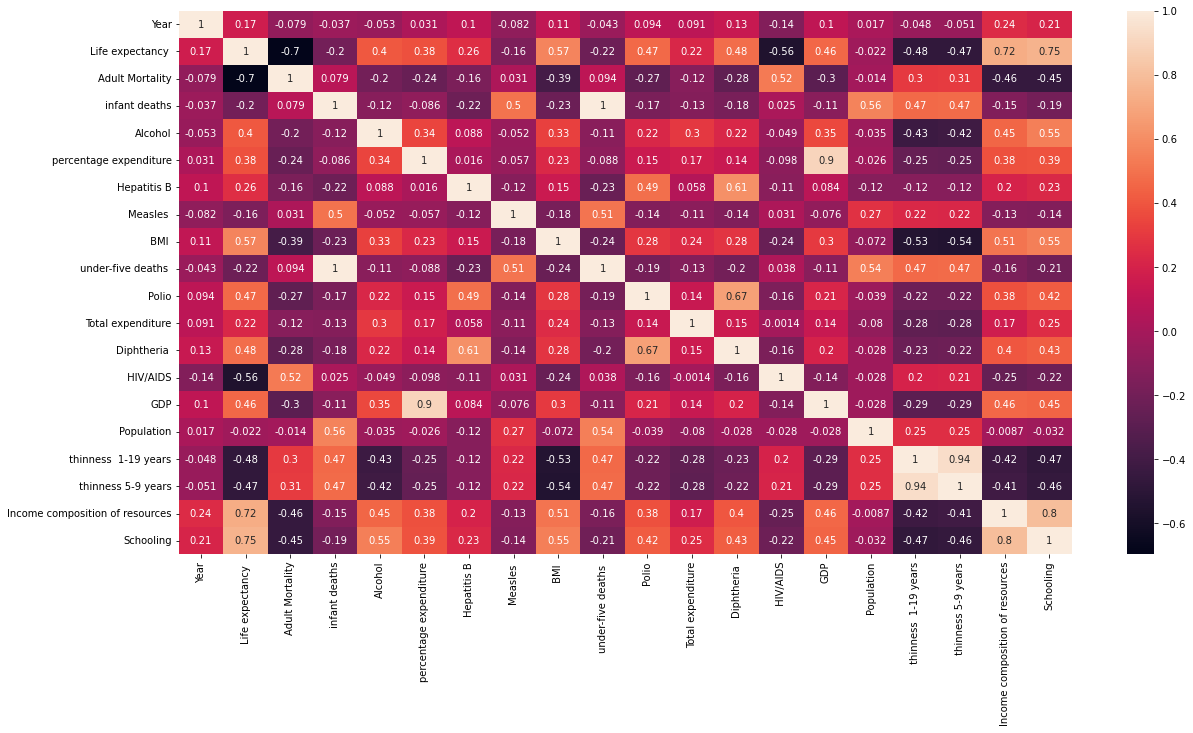

In [17]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot=True)

In [18]:
#hw: store anothe dataset in which there are the rows without population NaN values

In [19]:
noNanPop = data[data["Population"].isna() == False]

In [20]:
noNanPop[noNanPop["Population"].isna()].shape

(0, 22)

In [21]:
noNanPop

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [22]:
pd.DataFrame(list(zip(noNanPop.columns, noNanPop.isna().sum(),noNanPop.count(), (noNanPop.isna().sum()*100)/noNanPop.count())))

,0,1,2,3
0,Country,0,2286,0.000000
1,Year,0,2286,0.000000
2,Status,0,2286,0.000000
3,Life expectancy,2,2284,0.087566
4,Adult Mortality,2,2284,0.087566
5,infant deaths,0,2286,0.000000
6,Alcohol,156,2130,7.323944
7,percentage expenditure,0,2286,0.000000
8,Hepatitis B,482,1804,26.718404
9,Measles,0,2286,0.000000


In [23]:
noNanPop.dropna(inplace = True)

In [24]:
noNanPop

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<AxesSubplot:>

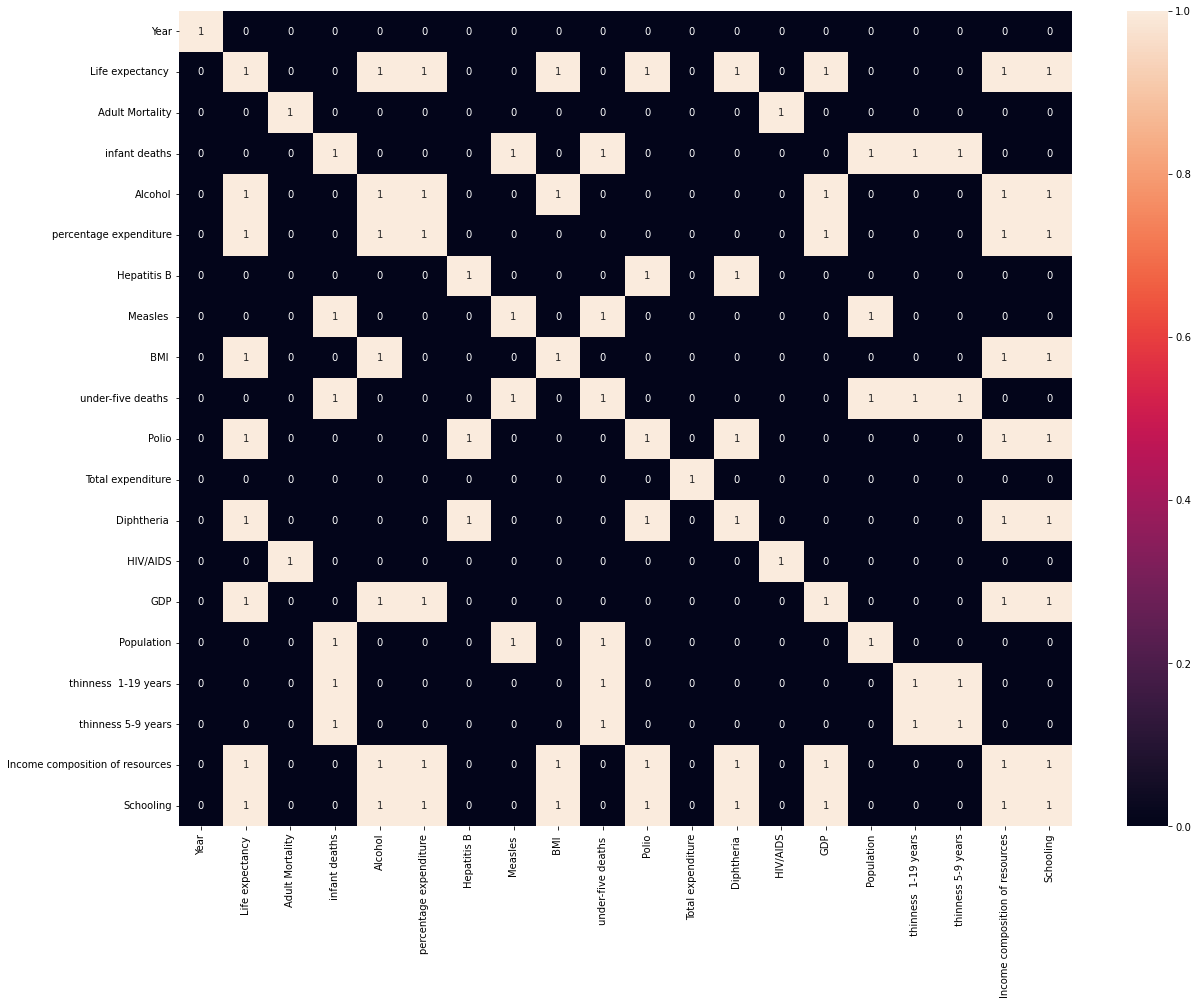

In [25]:
plot = plt.figure(figsize=(20,15))
sns.heatmap(noNanPop.corr() >= 0.3, annot=True)

In [26]:
noNanPop.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
noNanPop['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [28]:
noNanPop['StatusNum'] = noNanPop['Status'].apply(lambda x: 0 if x == "Developing" else 1)

In [29]:
noNanPop["StatusNum"].unique()

array([0, 1])

In [30]:
noNanPop.drop(['Country', 'Year', 'Status'], axis = 1, inplace = True)

In [31]:
noNanPop 

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,StatusNum
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


In [32]:
X = noNanPop[['Income composition of resources', 'Schooling', 
             'Diphtheria ', 'GDP', 'Polio', ' BMI ', 'Alcohol', 'percentage expenditure']]
Y = noNanPop[['Life expectancy ']]

In [33]:
noNanPop

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,StatusNum
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


## Splitting of Data set

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linearModel = LinearRegression(fit_intercept=True, normalize=True)

In [37]:
model = linearModel.fit(x_train, y_train)

In [51]:
yPred = model.predict(x_test)

In [39]:
model.intercept_

array([39.39285627])

In [40]:
model.n_features_in_

8

In [41]:
model.coef_

array([[ 1.81067997e+01,  1.13379707e+00,  2.08775206e-02,
        -1.23960161e-05,  1.74499292e-02,  7.08445690e-02,
        -3.74238741e-01,  8.32263703e-04]])

In [42]:
model.score(x_test, y_test)

0.6402882757252677

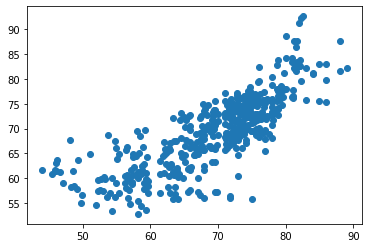

In [43]:
plt.scatter(y_test, yPred)

<AxesSubplot:xlabel='Life expectancy '>

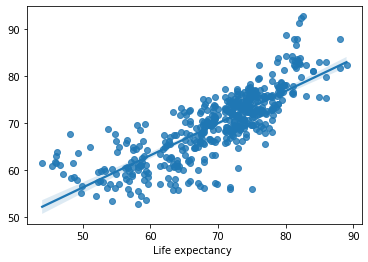

In [44]:
sns.regplot(y_test, yPred)

In [45]:
#HW: check every value in the predicted list yPred with the original value (y_test), find the difference
# between the actual value and predicited value

In [56]:
diffs = []
predictedtest, target_test = list(yPred), list(y_test)
for index, value in enumerate(predictedtest):
    diffs.append(value-target_test[index])

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U16'), dtype('float64')) -> None

['Life expectancy ']